In [1]:
import obi_one as obi
from pathlib import Path

In [2]:
input_root = "../../../obi-output/extracted_tiny_circuits"
output_root = Path("../../../obi-output/connectivity_matrix_extraction")

In [3]:
connectivity_matrix_extractions_form = obi.ConnectivityMatrixExtractions(
                    initialize=obi.ConnectivityMatrixExtractions.Initialize(
                        circuit_path=[
                            # obi.NamedPath(name="N_10__top_rc_nodes_dim2_rc", path=str(input_root / "N_10__top_rc_nodes_dim2_rc" / "circuit_config.json")),
                            # obi.NamedPath(name="N_10__top_nodes_dim6", path=str(input_root / "N_10__top_nodes_dim6" / "circuit_config.json")),
                            obi.NamedPath(name="N_10__selection1", path=str(input_root / "N_10__selection1" / "circuit_config.json")),
                            obi.NamedPath(name="N_10__selection2", path=str(input_root / "N_10__selection2" / "circuit_config.json")),

                        ],
                        edge_population="S1nonbarrel_neurons__S1nonbarrel_neurons__chemical",

                        # node_attributes=None,
                        node_attributes=("synapse_class", "layer", "mtype", "etype", "x", "y", "z"),
                    )
)

grid_scan = obi.GridScan(form=connectivity_matrix_extractions_form, output_root=output_root, coordinate_directory_option="VALUE")

In [4]:
grid_scan.execute(processing_method='run')

Info: Running idx 0
Info: Loading circuit 'N_10__selection1'
Info: Node properties to extract: ('synapse_class', 'layer', 'mtype', 'etype', 'x', 'y', 'z')
Info: Extracting connectivity from edge population 'S1nonbarrel_neurons__S1nonbarrel_neurons__chemical'


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 695.65it/s]


Info: Connectivity matrix successfully written to '../../../obi-output/connectivity_matrix_extraction/N_10__selection1/connectivity_matrix.h5'
Info: Running idx 1
Info: Loading circuit 'N_10__selection2'
Info: Node properties to extract: ('synapse_class', 'layer', 'mtype', 'etype', 'x', 'y', 'z')
Info: Extracting connectivity from edge population 'S1nonbarrel_neurons__S1nonbarrel_neurons__chemical'


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 1891.46it/s]

Info: Connectivity matrix successfully written to '../../../obi-output/connectivity_matrix_extraction/N_10__selection2/connectivity_matrix.h5'
create_bbp_workflow_campaign_config() not yet complete.


{0: None, 1: None}

>>>>>>> remote <removed>


N_10__selection1:


<COOrdinate sparse matrix of dtype 'int64'
	with 15 stored elements and shape (10, 10)>

92 synapses



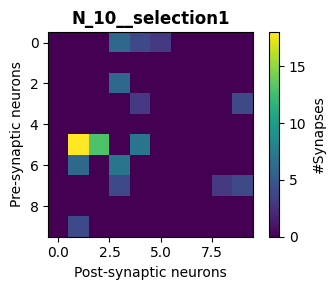

N_10__selection2:


<COOrdinate sparse matrix of dtype 'int64'
	with 15 stored elements and shape (10, 10)>

115 synapses



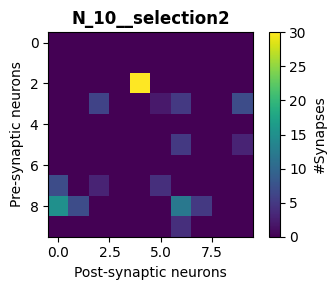

In [9]:
# Check & plot matrices
import matplotlib.pyplot as plt
from conntility.connectivity import ConnectivityMatrix
for _name in connectivity_matrix_extractions_form.initialize.circuit_path:
    print(f"{_name}:")
    cmat = ConnectivityMatrix.from_h5(output_root / str(_name) / "connectivity_matrix.h5")
    display(cmat.matrix)
    print(f"{cmat.matrix.sum()} synapses\n")

    plt.figure(figsize=(4, 3))
    plt.imshow(cmat.dense_matrix, interpolation="nearest")
    plt.xlabel("Post-synaptic neurons")
    plt.ylabel("Pre-synaptic neurons")
    plt.title(_name, fontweight="bold")
    plt.colorbar(label="#Synapses")
    plt.tight_layout()
    # plt.imsave(f"./{_name}__cmat.png", dpi=300)
    plt.show()